## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
data=pd.read_csv("Dataset11-Weather-Data.csv")
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## Data Size

In [3]:
data.shape

(8784, 8)

In [4]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [5]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


## Type of the Weather

In [8]:
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [9]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [11]:
data.Weather.nunique()#number of unique categories

50

## Converting Weather Categories into Standard Categories

In [12]:
x='Thunderstorms,Moderate Rain Showers,Fog'

In [13]:
list_of_lists=[w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [14]:
from itertools import chain
flat_list = list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [15]:
def Create_list(x):
    list_of_lists=[w.split() for w in x.split(',')]
    flat_list = list(chain(*list_of_lists))
    return flat_list

def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+RAIN'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return'CLEAR'
    elif 'Cloudy' in list1:
        return 'CLOUDY'
    else:
        return 'RAIN'

In [16]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [17]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [18]:
data['Std_Weather']=data['Weather'].apply(lambda x : Get_Weather(Create_list(x)))

In [19]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [20]:
data.Std_Weather.value_counts()

Std_Weather
CLOUDY       3797
CLEAR        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: count, dtype: int64

## Sampled Selection and Data Balancing

In [21]:
cloudy_df = data[data['Std_Weather']=='CLOUDY']
cloudy_df_sample = cloudy_df.sample(600)
cloudy_df_sample.shape

(600, 9)

In [22]:
clear_df = data[data['Std_Weather']=='CLEAR']
clear_df_sample = clear_df.sample(600)## to balance data set take 600 out of 3432 values(now all standard 4 categories have 600,600,603,556)-balanced
clear_df_sample.shape

(600, 9)

## Data Balancing

In [24]:
rain_df=data[data['Std_Weather']=='RAIN']
snow_df=data[data['Std_Weather']=='SNOW']

In [25]:
rain_df.shape

(603, 9)

In [26]:
snow_df.shape

(556, 9)

## Create New Weather DataSet

In [27]:
weather_df=pd.concat([cloudy_df_sample,clear_df_sample,rain_df,snow_df], axis=0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
7344,11/2/2012 0:00,5.3,2.8,84,19,25.0,99.40,Cloudy,CLOUDY
3995,6/15/2012 11:00,22.2,7.9,40,15,48.3,102.35,Mostly Cloudy,CLOUDY
4528,7/7/2012 16:00,29.1,15.7,44,17,48.3,100.28,Mostly Cloudy,CLOUDY
6539,9/29/2012 11:00,12.6,9.8,83,24,24.1,101.19,Cloudy,CLOUDY
1677,3/10/2012 21:00,-2.3,-8.1,64,11,25.0,102.54,Mostly Cloudy,CLOUDY


In [28]:
weather_df.shape

(2359, 9)

In [29]:
weather_df.Std_Weather.value_counts()

Std_Weather
RAIN      603
CLOUDY    600
CLEAR     600
SNOW      556
Name: count, dtype: int64

## Drop Column Date and Weather

In [30]:
weather_df.drop(columns=['Date/Time','Weather'],axis=1,inplace=True)

In [31]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
7344,5.3,2.8,84,19,25.0,99.40,CLOUDY
3995,22.2,7.9,40,15,48.3,102.35,CLOUDY
4528,29.1,15.7,44,17,48.3,100.28,CLOUDY
6539,12.6,9.8,83,24,24.1,101.19,CLOUDY
1677,-2.3,-8.1,64,11,25.0,102.54,CLOUDY


## Check Duplicate Records

In [32]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


## Check Null/Missing Values

In [33]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [34]:
weather_df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Std_Weather          object
dtype: object

## Data Visualization

In [35]:
weather_df.describe() ## give statistical values

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,7.014074,1.907588,72.302671,16.473082,23.211573,100.801827
std,11.353643,10.420572,16.067050,9.340602,12.719894,0.909469
min,-20.000000,-26.100000,18.000000,0.000000,0.600000,97.520000
25%,-2.100000,-6.400000,62.000000,9.000000,16.100000,100.320000
50%,5.600000,0.600000,76.000000,15.000000,24.100000,100.830000
75%,16.800000,10.900000,85.000000,22.000000,25.000000,101.390000
max,32.600000,23.100000,99.000000,63.000000,48.300000,103.650000


## Correlation among Features

In [37]:
cols=['Temp_C',	'Dew Point Temp_C',	'Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']

In [38]:
cor_matrix=weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.940370,-0.274536,-0.139664,0.407855,-0.077272
Dew Point Temp_C,0.940370,1.000000,0.062617,-0.137943,0.201970,-0.186194
Rel Hum_%,-0.274536,0.062617,1.000000,0.023777,-0.649038,-0.322244
Wind Speed_km/h,-0.139664,-0.137943,0.023777,1.000000,-0.147068,-0.407118
Visibility_km,0.407855,0.201970,-0.649038,-0.147068,1.000000,0.310015
Press_kPa,-0.077272,-0.186194,-0.322244,-0.407118,0.310015,1.000000


## Heat Map

<Axes: >

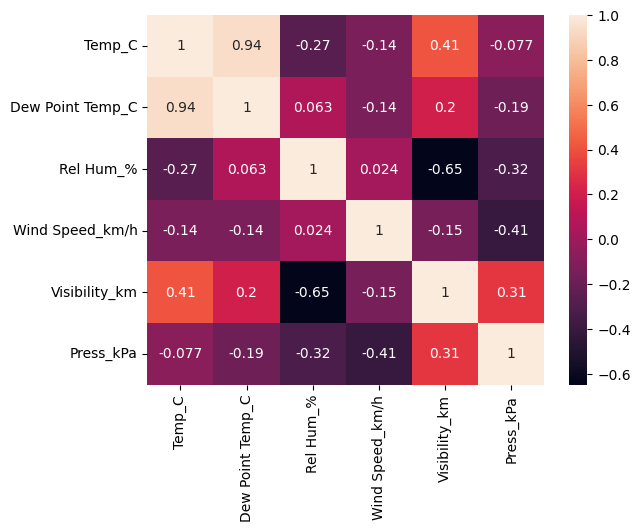

In [39]:
sns.heatmap(cor_matrix,annot=True)

In [40]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

<Axes: ylabel='Frequency'>

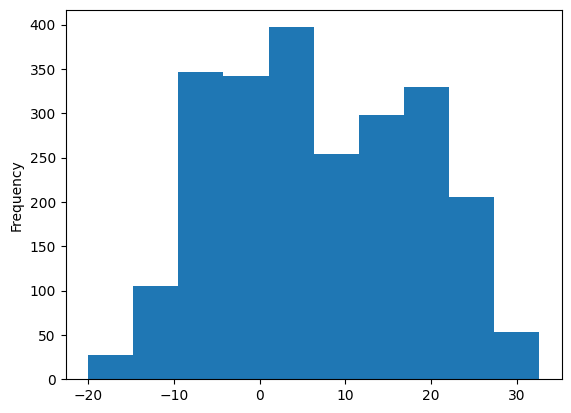

In [41]:
weather_df['Temp_C'].plot(kind='hist')

array([[<Axes: title={'center': 'Temp_C'}>,
        <Axes: title={'center': 'Dew Point Temp_C'}>],
       [<Axes: title={'center': 'Rel Hum_%'}>,
        <Axes: title={'center': 'Wind Speed_km/h'}>],
       [<Axes: title={'center': 'Visibility_km'}>,
        <Axes: title={'center': 'Press_kPa'}>]], dtype=object)

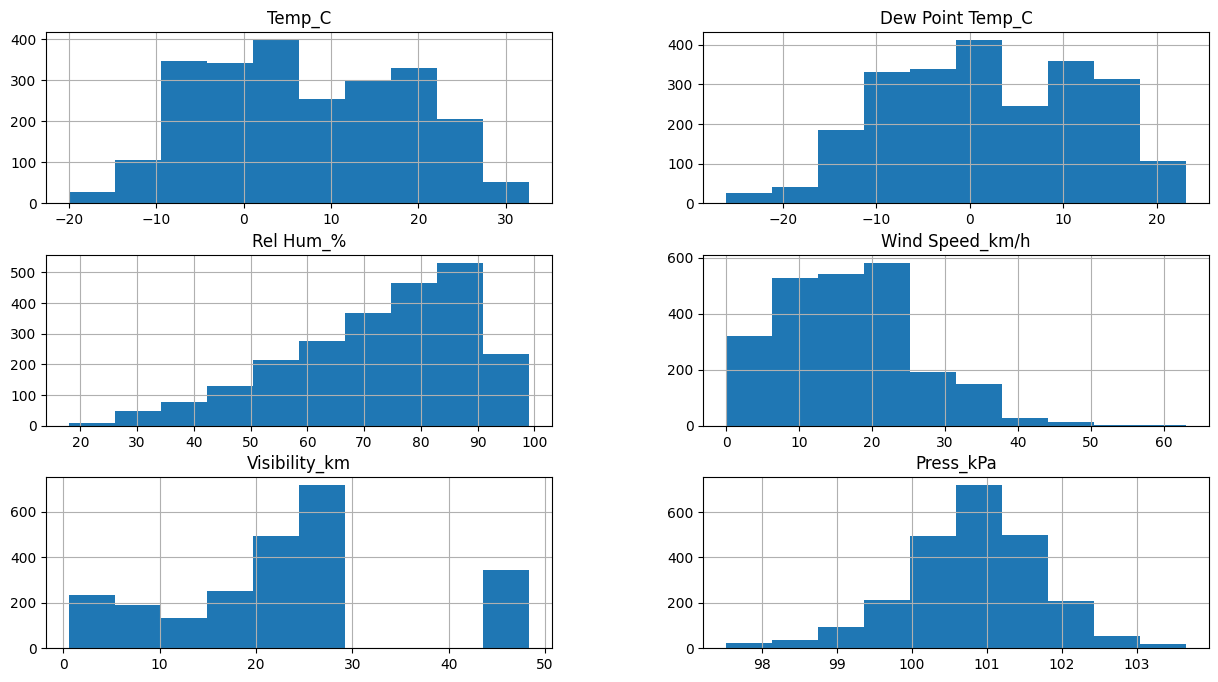

In [43]:
weather_df.hist(figsize=(15, 8))

<Axes: >

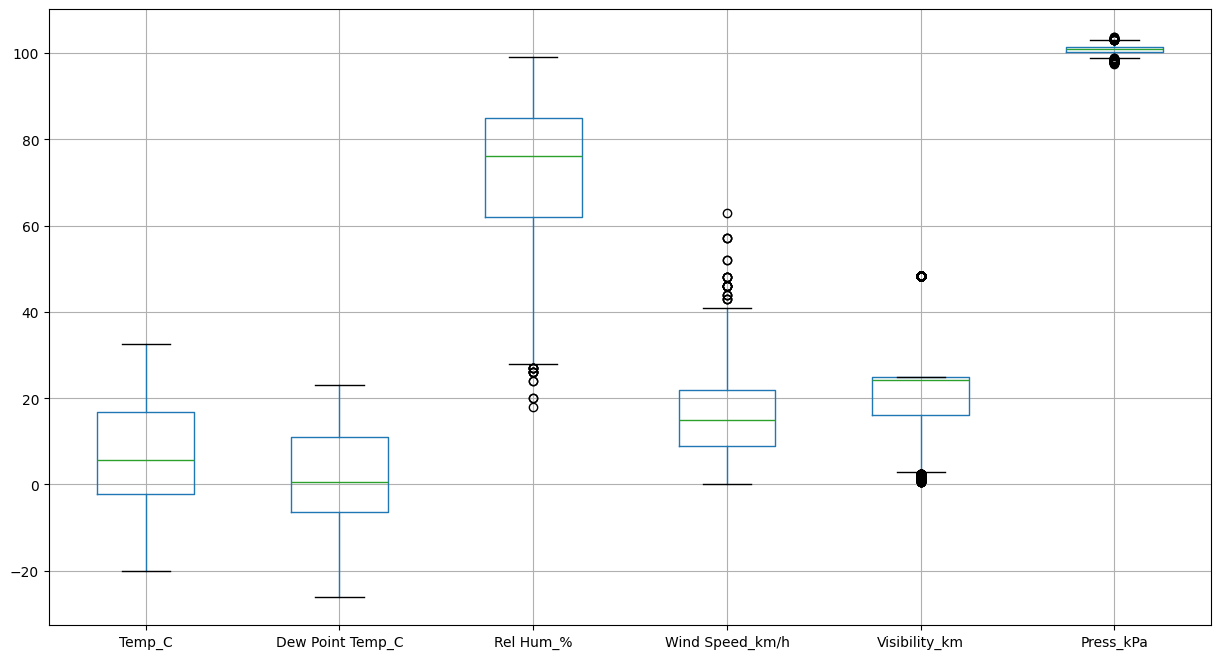

In [45]:
weather_df.boxplot(figsize=(15, 8))

## Lable Encoding
converting target variables into numeric data

In [46]:
from sklearn.preprocessing import LabelEncoder
lable_Encoder=LabelEncoder()

In [47]:
weather_df['Std_Weather']=lable_Encoder.fit_transform(weather_df['Std_Weather'])

In [48]:
lable_Encoder.classes_

array(['CLEAR', 'CLOUDY', 'RAIN', 'SNOW'], dtype=object)

In [49]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
7344,5.3,2.8,84,19,25.0,99.40,1
3995,22.2,7.9,40,15,48.3,102.35,1
4528,29.1,15.7,44,17,48.3,100.28,1
6539,12.6,9.8,83,24,24.1,101.19,1
1677,-2.3,-8.1,64,11,25.0,102.54,1


In [50]:
weather_df.Std_Weather.value_counts()

Std_Weather
2    603
1    600
0    600
3    556
Name: count, dtype: int64

## X,Y Variables

In [51]:
x=weather_df.drop(['Std_Weather'],axis=1)
x

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
7344,5.3,2.8,84,19,25.0,99.40
3995,22.2,7.9,40,15,48.3,102.35
4528,29.1,15.7,44,17,48.3,100.28
6539,12.6,9.8,83,24,24.1,101.19
1677,-2.3,-8.1,64,11,25.0,102.54
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [53]:
y=weather_df['Std_Weather']
y

7344    1
3995    1
4528    1
6539    1
1677    1
       ..
8779    3
8780    3
8781    3
8782    3
8783    3
Name: Std_Weather, Length: 2359, dtype: int32

## Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [55]:
x_std=std_scaler.fit_transform(x)
x_std

array([[-0.15100326,  0.0856576 ,  0.72818655,  0.27058792,  0.14063061,
        -1.54169551],
       [ 1.33782133,  0.57517787, -2.01091802, -0.15774082,  1.97279525,
         1.7026432 ],
       [ 1.94568462,  1.32385592, -1.76190851,  0.05642355,  1.97279525,
        -0.57389277],
       ...,
       [-0.66196082, -0.32707517,  1.28845794,  1.23432759, -1.44776963,
        -0.9368188 ],
       [-0.63553198, -0.35587048,  1.03944844,  1.23432759, -1.06246462,
        -0.98080983],
       [-0.61791275, -0.38466579,  0.85269131,  1.44849196, -0.93665074,
        -1.00280535]])

## Splitting Train abd Test Data

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.2,random_state=42)

In [58]:
x_train.shape,x_test.shape

((1887, 6), (472, 6))

## Model Bulilding

In [59]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()

## Model Training

In [60]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

## Model Prediction

In [61]:
y_pred_dt =decision_tree_model.predict(x_test)

## Model Evaluation

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Accuracy

In [63]:
accuracy_score(y_test,y_pred_dt)

0.6207627118644068

## Classificatin Report

In [64]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.55      0.56      0.55       118
           1       0.49      0.48      0.49       128
           2       0.67      0.66      0.67       126
           3       0.80      0.82      0.81       100

    accuracy                           0.62       472
   macro avg       0.63      0.63      0.63       472
weighted avg       0.62      0.62      0.62       472



## Confusion Matrix

<Axes: >

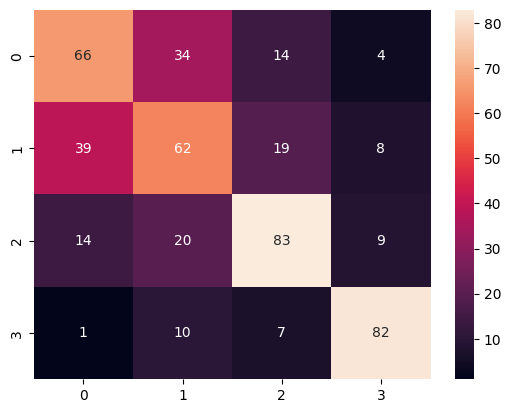

In [66]:
cm= confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm,annot=True,fmt='d')

## Building Multiple Models

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [70]:
df_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()
nb_model = GaussianNB()

In [71]:
model_list = [df_model,rf_model,svc_model,knn_model,lr_model,nb_model]

In [72]:
acc_list=[]
for model in model_list:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_list.append(acc)

In [73]:
acc_list

[0.6101694915254238,
 0.6652542372881356,
 0.6334745762711864,
 0.652542372881356,
 0.6313559322033898,
 0.5911016949152542]

In [75]:
model_df = pd.DataFrame({'Model':model_list,'Accuracy': acc_list})
model_df


,Model,Accuracy
0,DecisionTreeClassifier(),0.610169
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.665254
2,SVC(),0.633475
3,KNeighborsClassifier(),0.652542
4,LogisticRegression(),0.631356
5,GaussianNB(),0.591102


## K-Fold Cross Validation

In [76]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model,x_std,y,cv=5,scoring='accuracy')
print('Cross-Validation scores = ',scores)

Cross-Validation scores =  [0.58262712 0.66101695 0.60805085 0.61652542 0.64543524]


In [77]:
scores.mean()

0.6227311166288819

## HyperParameter Tunning: Model Tuning

In [78]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [79]:
parameters = {
    'n_estimators':[50,100],
    'max_features':['sqrt','log2',None]
}

In [80]:
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=parameters)

In [81]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

## Best HyperParameters

In [82]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [83]:
Random_forest_model_new = RandomForestClassifier(max_features='log2',n_estimators=50)

In [84]:
Random_forest_model_new.fit(x_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=50)

In [87]:
y_pred_rf = Random_forest_model_new.predict(x_test)

In [88]:
accuracy_score(y_test,y_pred_rf)

0.673728813559322

In [89]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_forest_model_new,x_std,y,cv=5,scoring='accuracy')
print('Cross-Validation scores = ',scores)

Cross-Validation scores =  [0.57838983 0.64830508 0.61652542 0.59322034 0.66029724]


In [90]:
scores.mean()

0.6193475835762353